In [3]:
!pwd

/Users/alessandrorinaldi/code/Pr4t3/DriverDrowsinessDetector/notebooks


## Model Testing

In [1]:
import os
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model


def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

In [2]:
BS= 32
TS=(24,24)
train_batch= generator('../raw_data/eyes/train_eyes',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('../raw_data/eyes/test_eyes',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
38 6


In [3]:
train_batch.classes[2000]

IndexError: index 2000 is out of bounds for axis 0 with size 1234

In [5]:
train_batch

In [ ]:
train_batch.

In [43]:
valid_batch[0][0][0].shape

(24, 24, 1)

In [30]:
img,labels= next(train_batch)
print(img.shape)

(32, 24, 24, 1)


In [18]:
# Model 
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

In [19]:
recall = tensorflow.keras.metrics.Recall(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[recall])

In [21]:
history = model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)

Epoch 1/15
38/38 [==============================] - 5s 96ms/step - loss: 0.5810 - recall_1: 0.5685 - val_loss: 0.1984 - val_recall_1: 0.7959
Epoch 2/15
38/38 [==============================] - 3s 77ms/step - loss: 0.2053 - recall_1: 0.8252 - val_loss: 0.1198 - val_recall_1: 0.8661
Epoch 3/15
38/38 [==============================] - 3s 75ms/step - loss: 0.1324 - recall_1: 0.8757 - val_loss: 0.1126 - val_recall_1: 0.8928
Epoch 4/15
34/38 [=========================>....] - ETA: 0s - loss: 0.0991 - recall_1: 0.8978

KeyboardInterrupt: 

In [9]:
history.history

{'loss': [0.48467546701431274,
  0.2426309734582901,
  0.1760774701833725,
  0.12988972663879395,
  0.11159021407365799,
  0.09007717669010162,
  0.07615191489458084,
  0.07563674449920654,
  0.049497053027153015,
  0.04989795386791229,
  0.04136193171143532,
  0.03383805230259895,
  0.021848252043128014,
  0.02236618660390377,
  0.025390611961483955],
 'recall': [0.6389206051826477,
  0.8298524618148804,
  0.8714417815208435,
  0.8912343382835388,
  0.9051792025566101,
  0.9161034822463989,
  0.9242489337921143,
  0.9300445914268494,
  0.935419499874115,
  0.9399245381355286,
  0.9435636401176453,
  0.9470612406730652,
  0.9502548575401306,
  0.9532415270805359,
  0.9557754397392273],
 'val_loss': [0.23124301433563232,
  0.13925863802433014,
  0.13407167792320251,
  0.10991454124450684,
  0.11352124065160751,
  0.09988829493522644,
  0.08953428268432617,
  0.08711806684732437,
  0.09196320921182632,
  0.09488915652036667,
  0.07793878018856049,
  0.07693366706371307,
  0.0925422534346

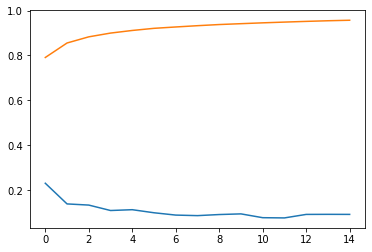

In [16]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_recall'])

In [16]:
model.save('../models/model_eyes.h5', overwrite=True)

In [36]:
#model.fit(train_batch, y=None, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE)

Epoch 1/15
77/77 [==============================] - 6s 79ms/step - loss: 0.4266 - recall_1: 0.7225
Epoch 2/15
77/77 [==============================] - 6s 77ms/step - loss: 0.3478 - recall_1: 0.7293
Epoch 3/15
77/77 [==============================] - 6s 75ms/step - loss: 0.3127 - recall_1: 0.7367
Epoch 4/15
77/77 [==============================] - 6s 72ms/step - loss: 0.2912 - recall_1: 0.7444
Epoch 5/15
77/77 [==============================] - 5s 71ms/step - loss: 0.2543 - recall_1: 0.7523
Epoch 6/15
77/77 [==============================] - 6s 72ms/step - loss: 0.2243 - recall_1: 0.7602
Epoch 7/15
77/77 [==============================] - 6s 72ms/step - loss: 0.2099 - recall_1: 0.7681
Epoch 8/15
57/77 [=====================>........] - ETA: 1s - loss: 0.1536 - recall_1: 0.7754


KeyboardInterrupt



/Users/alessandrorinaldi/.pyenv/versions/3.8.12/envs/DriverDrowsinessDetector/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Notes 

In [ ]:
y_pred = model.predict_classes(valid_batch[0][0])
y_pred


y_pred = np.argmax(model.predict(valid_batch[0][0]), axis=-1)
y_pred

In [ ]:

# Computing the probabilities of belonging to one of the 4 classes for the 10 000 images
predicted_probabilities = model.predict(X_test) # shape = 10_000 X 4

# Computing the predicted classes for all the images
predicted_classes = np.argmax(predicted_probabilities, axis = 1) # shape = 10_000 , 

# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = np.arange(0,4+1));

fig, ax = plt.subplots(figsize=(10,10));
disp.plot(cmap = "PuRd", ax = ax);